In [2]:
# !pip install numpy pandas matplotlib sympy scipy 

## imports

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy as sc

from sympy import symbols, Eq, solve, simplify, MatrixSymbol
from pprint import pprint
from IPython.display import display, Math


In [80]:

class system:
    def __init__(self, a, b, c):
        
        self.A = a
        self.B = b
        self.C = c
        
        self.n_states = a.shape[0]
        self.p_inputs = b.shape[1]
        
        self.x, self.u, self.t = symbols('x u t')
    
    
    
    def tracking_control(self, P, Q, R, track, T, runtime, x0, plot=True):
        N = int(runtime/T)
        k_prior = np.array([0, 0])

        sn = self.C.T @ P @ self.C
        vn = self.C.T @ P * track[-1]
        
        
        svals, vvals, kvals, kvvals = [], [], [], []
        s = sn
        v = vn
        k = k_prior
        for i in range(N+1):
            k = sc.linalg.inv(self.B.T @ s @ self.B + R) @ self.B.T @ s @ self.A
            
            kv = sc.linalg.inv(self.B.T @ s @ self.B + R) @ self.B.T
            
            s = self.A.T @ s @ (self.A - self.B @ k) + self.C.T @ Q @ self.C
            
            v = (self.A - self.B @ k).T @ v + self.C.T @ Q * track[len(track)-i-1]
            
            kvals.append(k)
            kvvals.append(kv)
            svals.append(s)
            vvals.append(v)
            
        kvals = np.array(kvals)[::-1]
        kvvals = np.array(kvvals)[::-1]
        svals = np.array(svals)[::-1]
        vvals = np.array(vvals)[::-1]
        

        x = x0
        xvals = [x]
        uvals = []
        for i in range(N):
            u = -kvals[i] @ x + kvvals[i] @ vvals[i+1]
            x = self.f(x, u)
            xvals.append(x)
            uvals.append(u)
        xvals = np.array(xvals)
        uvals = np.array(uvals)
        
        
        if plot:
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].plot(xvals[:, 0], label='x1', color="black")
            ax[0].plot(xvals[:, 1], label='x2', color="gray")
            ax[0].plot(track, label='track', color="red", linestyle="--")
            ax[0].set_title("State Trajectory")
            ax[0].legend()
            
            ax[1].plot(uvals[:, 0], label='u1', color="black")
            ax[1].set_title("Control Input")
            plt.show()
            
            
    def f(self, x, u):
        return self.A @ x + self.B @ u

# problem 3

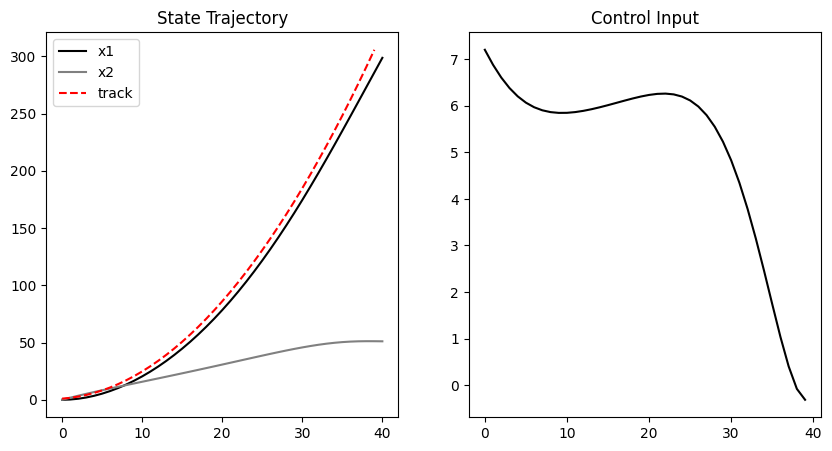

In [81]:
T = .25
runtime = 10

N = int(runtime / T)
a = np.array([[1, T], [0, 1]])
b = np.array([[T**2/2], [T]])
c = np.array([[1, 0]])

P = np.eye(c.shape[0])
Q = np.eye(c.shape[0])
R = np.eye(b.shape[1])

track = 1 + 2 * np.arange(0,runtime,T) + 3 * np.arange(0,runtime,T)**2
x0 = np.array([[0],[0]])

sys = system(a,b,c)

result = sys.tracking_control(P, Q, R, track, T, runtime, x0)